In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [11]:
data=pd.read_csv("C:/Users/SHARJEEL/Downloads/archive (3)/spam.csv",encoding=('cp1252'))
print(data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [17]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [19]:
#dropping unwanted columns
data = data.drop(columns=data.columns[2:5])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#renaming columns
data.columns = ['Category', 'Message']
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
#checking null values
data.isnull().sum()

Category    0
Message     0
dtype: int64

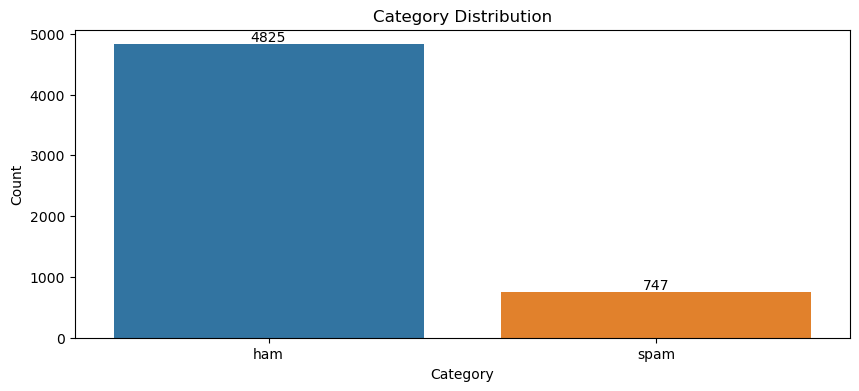

In [24]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
plt.figure(figsize=(10, 4))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [25]:
data['spam']= data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [27]:
#training and testing of data 
X_train, X_test, y_train, y_test = train_test_split(data.Message,data.spam, test_size=0.3)
from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)

In [31]:
print(X_train_count)

  (0, 4511)	1
  (0, 6206)	1
  (0, 3137)	1
  (0, 6385)	1
  (0, 6078)	1
  (0, 2760)	1
  (0, 3513)	1
  (1, 2688)	1
  (1, 1711)	1
  (1, 6999)	1
  (1, 960)	1
  (1, 7201)	1
  (2, 7201)	1
  (2, 3195)	1
  (2, 6483)	1
  (2, 4112)	1
  (2, 1515)	1
  (2, 4132)	1
  (2, 1025)	1
  (2, 7174)	1
  (3, 960)	1
  (3, 7201)	2
  (3, 996)	1
  (3, 6770)	1
  (3, 1989)	1
  :	:
  (3896, 7194)	1
  (3896, 3078)	1
  (3896, 3039)	1
  (3896, 2610)	1
  (3896, 4027)	2
  (3896, 6290)	1
  (3897, 960)	1
  (3897, 7201)	2
  (3897, 1515)	1
  (3897, 4648)	1
  (3897, 6357)	1
  (3897, 6523)	1
  (3897, 2610)	1
  (3897, 3631)	1
  (3897, 2973)	1
  (3897, 2652)	1
  (3898, 6782)	1
  (3898, 840)	1
  (3898, 5233)	1
  (3899, 6999)	1
  (3899, 3622)	1
  (3899, 7189)	1
  (3899, 2059)	1
  (3899, 3138)	1
  (3899, 2390)	1


In [33]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [34]:
X_test_count = featurer.transform(X_test)
model.score(X_test_count, y_test)

0.9820574162679426

In [37]:
# Pre-trained model
pretrained_model = model 
new_sentences = [
    "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"
]

new_sentences_count = featurer.transform(new_sentences)
# Predict whether each sentence is spam (1) or not (0)
predictions = pretrained_model.predict(new_sentences_count)

for sentence, prediction in zip(new_sentences, predictions):
    if prediction == 1:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL' is a spam message.
